1. Setup + Load Dataset (Google Drive / Colab-friendly)

Letakkan file CSV dataset Telco Customer Churn (Kaggle) ke Google Drive, contoh path:
`/content/drive/MyDrive/UAS/WA_Fn-UseC_-Telco-Customer-Churn.csv`

In [26]:
# 1) Setup: import + Load Dataset
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# User requested to use the local file
# Try the absolute local path first, then relative path
local_path = r'D:\backup\uas bengcrot\14120\WA_Fn-UseC_-Telco-Customer-Churn.csv'
relative_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

DATA_PATH = None

if os.path.exists(local_path):
    DATA_PATH = local_path
    print(f"SUCCESS: Found dataset at Local Path: {DATA_PATH}")
elif os.path.exists(relative_path):
    DATA_PATH = relative_path
    print(f"SUCCESS: Found dataset at Relative Path: {DATA_PATH}")
else:
    print("❌ File not found.")
    print(f"Checked: {local_path}")
    print(f"Checked: {relative_path}")
    print("\nIMPORTANT:")
    print("- If you are using a **Local Kernel**, check the path matches exactly.")
    print("- If you are using **Google Colab**, you MUST upload the file to the session:")
    print("  1. Open the 'Files' sidebar on the left (folder icon).")
    print("  2. Drag and drop 'WA_Fn-UseC_-Telco-Customer-Churn.csv' there.")
    print("  3. Run this cell again.")

if DATA_PATH:
    df = pd.read_csv(DATA_PATH)
    print(f"Loaded dataset shape: {df.shape}")
    display(df.head())

SUCCESS: Found dataset at Local Path: D:\backup\uas bengcrot\14120\WA_Fn-UseC_-Telco-Customer-Churn.csv
Loaded dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. EDA (sesuai poin penugasan)

In [27]:
# 2.1) Explorasi awal: head(), info(), describe()
display(df.head())
df.info()
display(df.describe(include='all').T)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# 2.1) Explorasi awal: head(), info(), describe()
display(df.head())
df.info()
display(df.describe(include='all').T)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,missing_%
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


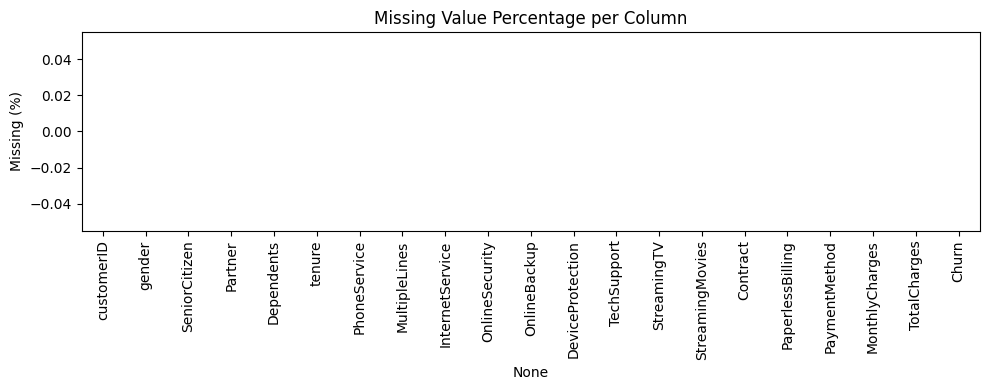

In [29]:
# 2.2) Missing value: persentase nilai kosong + diagram batang
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
display(missing_pct.to_frame('missing_%'))

plt.figure(figsize=(10, 4))
sns.barplot(x=missing_pct.index, y=missing_pct.values)
plt.xticks(rotation=90)
plt.ylabel('Missing (%)')
plt.title('Missing Value Percentage per Column')
plt.tight_layout()
plt.show()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

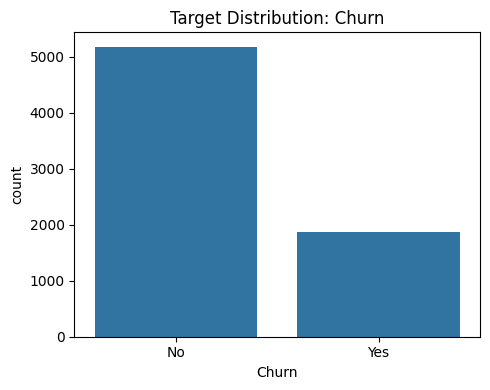

In [30]:
# 2.3) Distribusi target (Churn)
assert 'Churn' in df.columns, 'Kolom target Churn tidak ditemukan.'
target_counts = df['Churn'].value_counts(dropna=False)
display(target_counts)

plt.figure(figsize=(5, 4))
sns.countplot(x='Churn', data=df)
plt.title('Target Distribution: Churn')
plt.tight_layout()
plt.show()

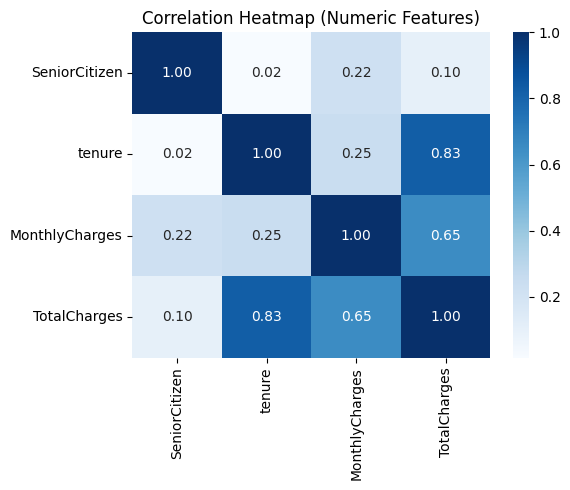

In [31]:
# 2.4) Korelasi: heatmap untuk fitur numerik
# Catatan: di dataset ini fitur numerik utama biasanya tenure, MonthlyCharges, TotalCharges (perlu konversi).
df_eda = df.copy()
df_eda['TotalCharges'] = pd.to_numeric(df_eda.get('TotalCharges'), errors='coerce')
num_cols = df_eda.select_dtypes(include=['number']).columns.tolist()
corr = df_eda[num_cols].corr(numeric_only=True)

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.show()

3. Modeling: 3 kategori model × 3 skenario (Direct / Preprocessing / Tuning)

In [32]:
# 3) Utilitas evaluasi + split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

RANDOM_STATE = 42
TEST_SIZE = 0.2

def evaluate_classifier(name, y_true, y_pred):
    return {
        'model': name,
        'accuracy': float(accuracy_score(y_true, y_pred)),
        'precision': float(precision_score(y_true, y_pred, pos_label='Yes')),
        'recall': float(recall_score(y_true, y_pred, pos_label='Yes')),
        'f1': float(f1_score(y_true, y_pred, pos_label='Yes')),
        'confusion_matrix': confusion_matrix(y_true, y_pred).tolist(),
    }

def show_eval(y_true, y_pred):
    print(classification_report(y_true, y_pred, digits=4))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

Training SVM (Direct)...
Results for SVM (Direct):
              precision    recall  f1-score   support

          No     0.7342    1.0000    0.8467      1033
         Yes     0.0000    0.0000    0.0000       374

    accuracy                         0.7342      1407
   macro avg     0.3671    0.5000    0.4234      1407
weighted avg     0.5390    0.7342    0.6217      1407



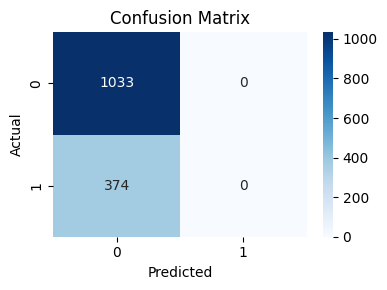

------------------------------
Training RandomForest (Direct)...
Results for RandomForest (Direct):
              precision    recall  f1-score   support

          No     0.8305    0.8964    0.8622      1033
         Yes     0.6336    0.4947    0.5556       374

    accuracy                         0.7896      1407
   macro avg     0.7320    0.6955    0.7089      1407
weighted avg     0.7781    0.7896    0.7807      1407



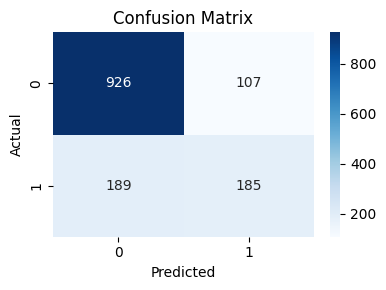

------------------------------
Training Voting (Direct)...
Results for Voting (Direct):
              precision    recall  f1-score   support

          No     0.7997    0.9351    0.8621      1033
         Yes     0.6633    0.3529    0.4607       374

    accuracy                         0.7804      1407
   macro avg     0.7315    0.6440    0.6614      1407
weighted avg     0.7634    0.7804    0.7554      1407



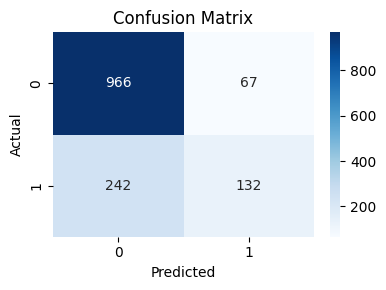

------------------------------


,model,accuracy,precision,recall,f1,confusion_matrix
0,SVM (Direct),0.734186,0.000000,0.000000,0.000000,"[[1033, 0], [374, 0]]"
1,RandomForest (Direct),0.789623,0.633562,0.494652,0.555556,"[[926, 107], [189, 185]]"
2,Voting (Direct),0.780384,0.663317,0.352941,0.460733,"[[966, 67], [242, 132]]"


In [33]:
# 3.1) DIRECT modeling (tanpa preprocessing & tanpa tuning)
# Catatan implementasi: dataset memiliki banyak fitur kategorikal, jadi perlu encoding minimum agar model bisa berjalan.
# Di skenario 'direct' ini kita lakukan encoding minimum (get_dummies) tanpa scaling/imputation kompleks/tuning.

df_direct = df.copy()
if 'customerID' in df_direct.columns:
    df_direct = df_direct.drop(columns=['customerID'])

# Pastikan TotalCharges numerik; baris invalid dibuang agar 'direct' tetap minimal
if 'TotalCharges' in df_direct.columns:
    df_direct['TotalCharges'] = pd.to_numeric(df_direct['TotalCharges'], errors='coerce')
    df_direct = df_direct.dropna(subset=['TotalCharges'])

X = df_direct.drop(columns=['Churn'])
y = df_direct['Churn'].astype(str)

# One-hot minimal untuk kategorikal
X_direct = pd.get_dummies(X, drop_first=False)

X_train, X_test, y_train, y_test = train_test_split(
    X_direct, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Pilihan model (1 per kategori):
# - Konvensional: SVM
# - Bagging: RandomForest
# - Voting: LR + SVM + KNN
svm_direct = SVC(kernel='rbf', C=1.0, gamma='scale')
rf_direct = RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE)
voting_direct = VotingClassifier(
    estimators=[
        ('svm', SVC(kernel='rbf', C=1.0, gamma='scale')),
        ('lr', LogisticRegression(random_state=RANDOM_STATE)),
        ('knn', KNeighborsClassifier())
    ],
    voting='hard'
)

# Global registry to store all trained models for final selection
all_trained_models = {}

direct_results = []
for model_name, model in [
    ('SVM (Direct)', svm_direct),
    ('RandomForest (Direct)', rf_direct),
    ('Voting (Direct)', voting_direct)
]:
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Save to registry
    all_trained_models[model_name] = model

    # Evaluate
    metrics = evaluate_classifier(model_name, y_test, y_pred)
    direct_results.append(metrics)
    
    print(f"Results for {model_name}:")
    show_eval(y_test, y_pred)
    print("-" * 30)

# Show comparison table
results_df = pd.DataFrame(direct_results)
display(results_df)

Training SVM (Prep)...
              precision    recall  f1-score   support

          No     0.8309    0.8993    0.8638      1033
         Yes     0.6401    0.4947    0.5581       374

    accuracy                         0.7918      1407
   macro avg     0.7355    0.6970    0.7109      1407
weighted avg     0.7802    0.7918    0.7825      1407



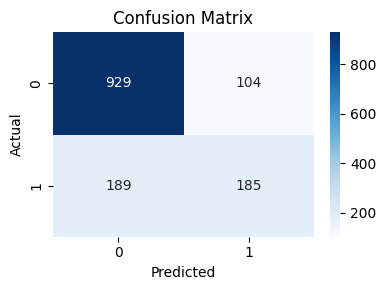

------------------------------
Training RandomForest (Prep)...
              precision    recall  f1-score   support

          No     0.8277    0.8974    0.8611      1033
         Yes     0.6307    0.4840    0.5477       374

    accuracy                         0.7875      1407
   macro avg     0.7292    0.6907    0.7044      1407
weighted avg     0.7753    0.7875    0.7778      1407



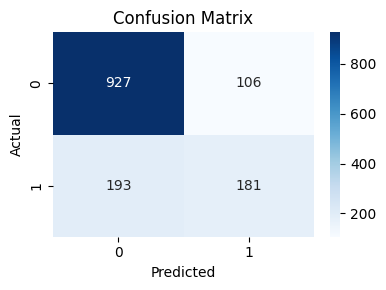

------------------------------
Training Voting (Prep)...
              precision    recall  f1-score   support

          No     0.8284    0.9022    0.8638      1033
         Yes     0.6418    0.4840    0.5518       374

    accuracy                         0.7910      1407
   macro avg     0.7351    0.6931    0.7078      1407
weighted avg     0.7788    0.7910    0.7808      1407



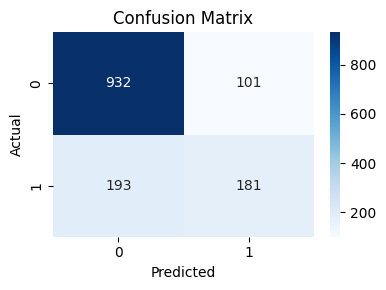

------------------------------


,model,accuracy,precision,recall,f1,confusion_matrix
0,SVM (Prep),0.791756,0.640138,0.494652,0.558069,"[[929, 104], [189, 185]]"
1,RandomForest (Prep),0.787491,0.630662,0.483957,0.547655,"[[927, 106], [193, 181]]"
2,Voting (Prep),0.791045,0.641844,0.483957,0.551829,"[[932, 101], [193, 181]]"


In [34]:
# 3.2) PREPROCESSING modeling (StandardScaler + OneHot, Default Params)
# Tujuan: Melihat peningkatan performa hanya dengan preprocessing yang baik (tanpa tuning).

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Re-split raw data (agar konsisten dengan 3.3)
df_prep = df.copy()
if 'customerID' in df_prep.columns:
    df_prep = df_prep.drop(columns=['customerID'])
df_prep['TotalCharges'] = pd.to_numeric(df_prep['TotalCharges'], errors='coerce')
df_prep = df_prep.dropna(subset=['TotalCharges'])

X_raw = df_prep.drop(columns=['Churn'])
y_raw = df_prep['Churn'].astype(str)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_raw
)

num_cols = X_raw.select_dtypes(include=['number']).columns
cat_cols = X_raw.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Pipelines with Default Params
svm_prep = Pipeline(steps=[('preprocess', preprocess), ('model', SVC(probability=True))])
rf_prep  = Pipeline(steps=[('preprocess', preprocess), ('model', RandomForestClassifier(random_state=RANDOM_STATE))])
voting_prep = Pipeline(steps=[('preprocess', preprocess), ('model', VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True)), 
        ('rf', RandomForestClassifier(random_state=RANDOM_STATE)),
        ('lr', LogisticRegression(random_state=RANDOM_STATE))
    ], voting='soft'
))])

prep_results = []
for name, model in [
    ('SVM (Prep)', svm_prep),
    ('RandomForest (Prep)', rf_prep),
    ('Voting (Prep)', voting_prep)
]:
    print(f"Training {name}...")
    model.fit(X_train_raw, y_train_raw)
    y_pred = model.predict(X_test_raw)
    
    # Save to registry
    all_trained_models[name] = model

    metrics = evaluate_classifier(name, y_test_raw, y_pred)
    prep_results.append(metrics)
    show_eval(y_test_raw, y_pred)
    print("-" * 30)

display(pd.DataFrame(prep_results))

Tuning SVM (Tuned)...
Best Params: {'model__C': 1, 'model__kernel': 'rbf'}
              precision    recall  f1-score   support

          No     0.8309    0.8993    0.8638      1033
         Yes     0.6401    0.4947    0.5581       374

    accuracy                         0.7918      1407
   macro avg     0.7355    0.6970    0.7109      1407
weighted avg     0.7802    0.7918    0.7825      1407



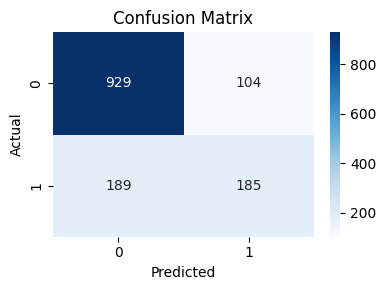

------------------------------
Tuning RandomForest (Tuned)...
Best Params: {'model__max_depth': 10, 'model__n_estimators': 100}
              precision    recall  f1-score   support

          No     0.8367    0.8925    0.8637      1033
         Yes     0.6361    0.5187    0.5714       374

    accuracy                         0.7932      1407
   macro avg     0.7364    0.7056    0.7176      1407
weighted avg     0.7833    0.7932    0.7860      1407



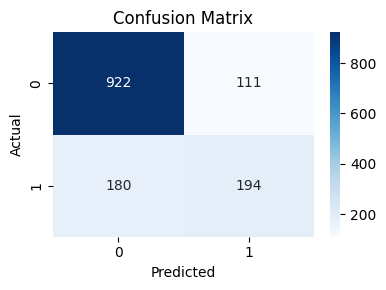

------------------------------
Tuning Voting (Tuned)...
Best Params: {'model__voting': 'hard'}
              precision    recall  f1-score   support

          No     0.8379    0.8955    0.8657      1033
         Yes     0.6436    0.5214    0.5761       374

    accuracy                         0.7960      1407
   macro avg     0.7407    0.7084    0.7209      1407
weighted avg     0.7862    0.7960    0.7887      1407



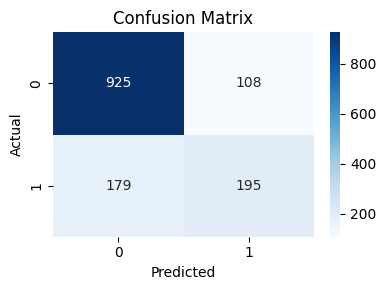

------------------------------


,model,accuracy,precision,recall,f1,confusion_matrix
0,SVM (Tuned),0.791756,0.640138,0.494652,0.558069,"[[929, 104], [189, 185]]"
1,RandomForest (Tuned),0.793177,0.636066,0.518717,0.571429,"[[922, 111], [180, 194]]"
2,Voting (Tuned),0.796020,0.643564,0.521390,0.576071,"[[925, 108], [179, 195]]"


In [35]:
# 3.3) HYPERPARAMETER TUNING (GridSearchCV) untuk 3 model
# Scoring default: f1 (positif='Yes') agar sesuai churn focus.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer

# 1. Prepare Raw Data (Pipeline expects raw features, not get_dummies)
# Kita perlu split ulang dari df original karena Pipeline akan menangani encoding
df_tune = df.copy()
if 'customerID' in df_tune.columns:
    df_tune = df_tune.drop(columns=['customerID'])
df_tune['TotalCharges'] = pd.to_numeric(df_tune['TotalCharges'], errors='coerce')
df_tune = df_tune.dropna(subset=['TotalCharges'])

X_raw = df_tune.drop(columns=['Churn'])
y_raw = df_tune['Churn'].astype(str)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_raw
)

# 2. Define Preprocessing (StandardScaler for numeric, OneHot for categorical)
num_cols = X_raw.select_dtypes(include=['number']).columns
cat_cols = X_raw.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# 3. Define Pipelines
svm_tune = Pipeline(steps=[('preprocess', preprocess), ('model', SVC(probability=True))])
rf_tune  = Pipeline(steps=[('preprocess', preprocess), ('model', RandomForestClassifier(random_state=RANDOM_STATE))])

# Voting: Combine SVM, RF, LR
voting_base = VotingClassifier(
    estimators=[
        ('svm', SVC(probability=True)), 
        ('rf', RandomForestClassifier(random_state=RANDOM_STATE)),
        ('lr', LogisticRegression(random_state=RANDOM_STATE))
    ],
    voting='soft'
)
voting_tune = Pipeline(steps=[('preprocess', preprocess), ('model', voting_base)])

# 4. Define Parameter Grids
f1_yes = make_scorer(f1_score, pos_label='Yes')

param_grid_svm = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['rbf']
}

param_grid_rf = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [10, 20],
}

param_grid_voting = {
    'model__voting': ['soft', 'hard']
}

# 5. Run GridSearch
tune_results = []

for name, pipeline, params in [
    ('SVM (Tuned)', svm_tune, param_grid_svm),
    ('RandomForest (Tuned)', rf_tune, param_grid_rf),
    ('Voting (Tuned)', voting_tune, param_grid_voting)
]:
    print(f"Tuning {name}...")
    grid = GridSearchCV(pipeline, params, cv=3, scoring=f1_yes, n_jobs=-1)
    grid.fit(X_train_raw, y_train_raw)
    
    best_model = grid.best_estimator_
    
    # Save to registry
    all_trained_models[name] = best_model

    y_pred = best_model.predict(X_test_raw)
    
    print(f"Best Params: {grid.best_params_}")
    metrics = evaluate_classifier(name, y_test_raw, y_pred)
    tune_results.append(metrics)
    
    show_eval(y_test_raw, y_pred)
    print("-" * 30)

display(pd.DataFrame(tune_results))

=== FINAL LEADERBOARD (Sorted by F1-Score) ===


,model,accuracy,precision,recall,f1,confusion_matrix
8,Voting (Tuned),0.796020,0.643564,0.521390,0.576071,"[[925, 108], [179, 195]]"
7,RandomForest (Tuned),0.793177,0.636066,0.518717,0.571429,"[[922, 111], [180, 194]]"
3,SVM (Prep),0.791756,0.640138,0.494652,0.558069,"[[929, 104], [189, 185]]"
6,SVM (Tuned),0.791756,0.640138,0.494652,0.558069,"[[929, 104], [189, 185]]"
1,RandomForest (Direct),0.789623,0.633562,0.494652,0.555556,"[[926, 107], [189, 185]]"
5,Voting (Prep),0.791045,0.641844,0.483957,0.551829,"[[932, 101], [193, 181]]"
4,RandomForest (Prep),0.787491,0.630662,0.483957,0.547655,"[[927, 106], [193, 181]]"
2,Voting (Direct),0.780384,0.663317,0.352941,0.460733,"[[966, 67], [242, 132]]"
0,SVM (Direct),0.734186,0.000000,0.000000,0.000000,"[[1033, 0], [374, 0]]"


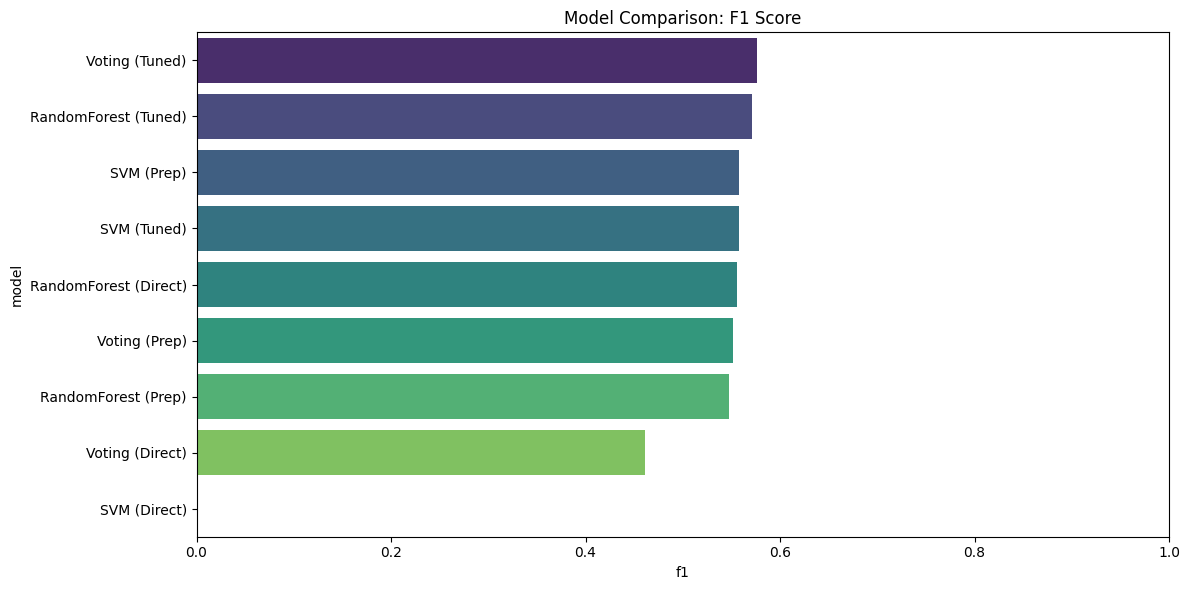

Kesimpulan:
Model terbaik adalah Voting (Tuned) dengan F1-Score 0.5761.


In [36]:
# 4) COMPARISON & CONCLUSION
# Gabungkan semua hasil: Direct, Preprocessing, Tuning

# Ensure all result lists exist (handle cases where cells might not have been run)
all_results = []
if 'direct_results' in locals(): all_results += direct_results
if 'prep_results' in locals(): all_results += prep_results
if 'tune_results' in locals(): all_results += tune_results

if all_results:
    df_results = pd.DataFrame(all_results).sort_values(by='f1', ascending=False)

    print("=== FINAL LEADERBOARD (Sorted by F1-Score) ===")
    display(df_results)

    # Plot comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_results, y='model', x='f1', palette='viridis')
    plt.title('Model Comparison: F1 Score')
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

    print("Kesimpulan:")
    best_model = df_results.iloc[0]
    print(f"Model terbaik adalah {best_model['model']} dengan F1-Score {best_model['f1']:.4f}.")
else:
    print("No results found. Please run sections 3.1, 3.2, and 3.3 first.")

In [37]:
# 5) DEPLOYMENT PREPARATION
# Simpan model terbaik untuk digunakan di Streamlit
import joblib

# Ambil model terbaik dari leaderboard (baris pertama)
if 'df_results' in locals() and not df_results.empty:
    best_model_row = df_results.iloc[0]
    best_model_name = best_model_row['model']
    best_score = best_model_row['f1']

    print(f"=== BEST MODEL SELECTED ===")
    print(f"Model: {best_model_name}")
    print(f"F1-Score: {best_score:.4f}")

    # Retrieve object from registry
    if best_model_name in all_trained_models:
        best_model_obj = all_trained_models[best_model_name]
        
        # Save to disk
        filename = 'best_churn_model.pkl'
        joblib.dump(best_model_obj, filename)
        print(f"✅ Model saved to {filename}")
        print("Siap untuk deployment ke Streamlit!")
    else:
        print(f"❌ Error: Model object for '{best_model_name}' not found in registry.")
else:
    print("❌ No results found. Please run all modeling sections first.")

=== BEST MODEL SELECTED ===
Model: Voting (Tuned)
F1-Score: 0.5761
✅ Model saved to best_churn_model.pkl
Siap untuk deployment ke Streamlit!
